In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [34]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [35]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

In [36]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [37]:
df.loc[5:10, 'crim'] = np.nan
df.loc[15:18, 'age'] = np.nan

In [38]:
df['crim'] = df['crim'].fillna(df['crim'].mean())
df['age'] = df['age'].fillna(df['age'].median())

In [39]:
Q1 = df['tax'].quantile(0.25)
Q3 = df['tax'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tax'] < Q1 - 1.5 * IQR) | (df['tax'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'tax': {outliers.shape[0]}")

Number of outliers in 'tax': 0


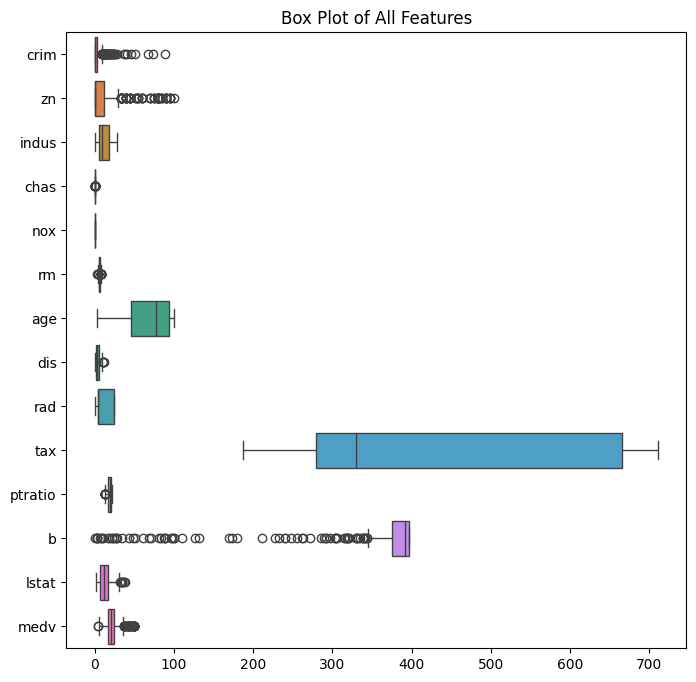

In [40]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of All Features")
plt.show()
